In [1]:

import numpy as np
import pandas as pd
import os
import gc
import re


In [3]:

# loading dataset
test_data = pd.read_csv('/content/sample_data/test.csv')
train_data = pd.read_csv('/content/sample_data/train.csv')


In [ ]:

# describing dataset

In [4]:
train_data.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [5]:
train_data.shape

(27481, 4)

In [6]:
test_data.head()

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive


In [7]:
test_data.shape

(3534, 3)

In [8]:
# working with pytorch
!pip install transformers
!pip install torch
import torch
from tqdm.notebook import tqdm
from sklearn.utils import shuffle
from transformers import RobertaModel, RobertaTokenizer

from torch.utils.data import Dataset, DataLoader


     |████████████████████████████████| 1.9MB 8.1MB/s 
     |████████████████████████████████| 890kB 51.9MB/s 
     |████████████████████████████████| 3.2MB 50.8MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=5c97564ad03826944bb4be4828e0f909aeeb3ea81ba68744e248a58be5222e71
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


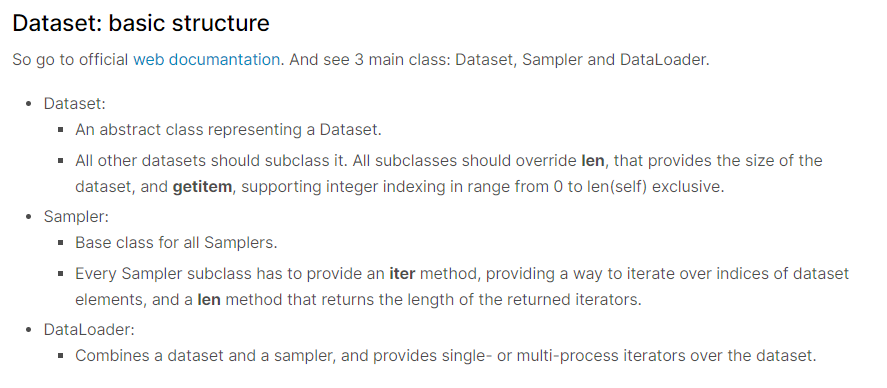

In [ ]:

# defining pytorch dataset

In [ ]:
# data preprocessing (tokenizing data, padding, pre-processing)

In [ ]:
# using BERT / roBERTa model

Defining Hyperparameter in advance

In [9]:
# defining hyperparameters

EPOCHS = 10
SPLIT = 0.8
MAXLEN = 48

np.random.seed(42)


BATCH_SIZE = 384
LR = 1e-2

VAL_BATCH_SIZE = 384
MODEL_SAVE_PATH = '/content/sample_data/dspd_sentiment_analysis.pt'

In [ ]:
train_data.head()

In [ ]:
# train_y

In [10]:

from transformers import AutoConfig, AutoModelForSequenceClassification, AutoTokenizer

model_name = 'roberta-base'

#model_name = 'bert-base'
config = AutoConfig.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_config(config=config)
tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=True)

In [11]:
class TweetDataset(Dataset):
    def __init__(self, data, tokenizer):
        self.data = data
        self.text = data.text
        self.tokenizer = tokenizer
        self.sentiment = data.sentiment
        self.sentiment_dict = {"positive": 0, "neutral": 1, "negative": 2}

    def __len__(self):
        return len(self.data)

    def __getitem__(self, i):
        start, finish = 0, 2
        pg, tg = 'post', 'post'
        tweet = str(self.text[i]).strip()
        tweet_ids = self.tokenizer.encode(tweet)

        attention_mask_idx = len(tweet_ids) - 1
        if start not in tweet_ids: tweet_ids = start + tweet_ids
        tweet_ids = pad([tweet_ids], maxlen=MAXLEN, value=1, padding=pg, truncating=tg)

        attention_mask = np.zeros(MAXLEN)
        attention_mask[1:attention_mask_idx] = 1
        attention_mask = attention_mask.reshape((1, -1))
        if finish not in tweet_ids: tweet_ids[-1], attention_mask[-1] = finish, start
            
        sentiment = [self.sentiment_dict[self.sentiment[i]]]
        sentiment = torch.FloatTensor(to_categorical(sentiment, num_classes=3))
        return sentiment, torch.LongTensor(tweet_ids), torch.LongTensor(attention_mask)



In [14]:
  train_df = shuffle(train_data)
  train_df = train_df.reset_index(drop=True)
  split = np.int32(SPLIT*len(train_df))
  val_df, train_df = train_df[split:], train_df[:split]

  val_df = val_df.reset_index(drop=True)
  val_dataset = TweetDataset(val_df, tokenizer)
  train_dataset = TweetDataset(train_df, tokenizer)
 

In [41]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/MyDrive/DSPD



/content/gdrive/MyDrive/DSPD


In [8]:

!git init
!git remote add origin https://a0d6c888a0e69b6afe2a14ee97c0fd4456bda58b/ahsan-ali3/DataScience-Projects.git

Reinitialized existing Git repository in /content/gdrive/My Drive/DSPD/.git/
fatal: remote origin already exists.


In [5]:
!git remote -v

origin	https://6ffe9d3b7c62d623d2137164e845b6402caad529@github.com/ahsan-ali3/DataScience-Projects.git (fetch)
origin	https://6ffe9d3b7c62d623d2137164e845b6402caad529@github.com/ahsan-ali3/DataScience-Projects.git (push)


In [6]:
!git config --global user.email 'ahsan_evol@live.com'
!git config --global user.name 'ahsan-ali3'

In [7]:
!git add .
!git commit -m 'First commit'
!git push https://a0d6c888a0e69b6afe2a14ee97c0fd4456bda58b@github.com/ahsan-ali3/DataScience-Projects.git

[master (root-commit) 4ed042d] First commit
 1 file changed, 1 insertion(+)
 create mode 100644 DSPD-Project-Phase2_new.ipynb
fatal: could not read Password for 'https://6ffe9d3b7c62d623d2137164e845b6402caad529@github.com': No such device or address


We are working on model exploration and understanding the working of each model. Roberta model is best fit for deep learning and nlp models.
RoBERTa builds on BERT’s language masking strategy, wherein the system learns to predict intentionally hidden sections of text within otherwise unannotated language examples. RoBERTa, which was implemented in PyTorch, modifies key hyperparameters in BERT, including removing BERT’s next-sentence pretraining objective, and training with much larger mini-batches and learning rates.

Bert can also be used as NLP analysis. We are figuring out to use either one.